In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf

import os
import sys
import time

from tensorflow import keras



In [14]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
dir(housing)
print(housing.DESCR)
print("=" * 100)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [17]:
from sklearn.model_selection import train_test_split

# default test_size is 0.25
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11
)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


In [23]:
from tensorflow.keras.models import Model

# keras函数式api
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)

model: Model = Model(inputs=[input_wide, input_deep], outputs=[output])

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
]
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
____________________________________________________________________________________________

In [24]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]

x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]

x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit(
    [x_train_scaled_wide, x_train_scaled_deep],
    y_train,
    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
    epochs=100,
    callbacks=callbacks
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 131us/sample - loss: 1.3381 - val_loss: 0.6009
Epoch 2/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5266 - val_loss: 0.5189
Epoch 3/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4929 - val_loss: 0.5237
Epoch 4/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4532 - val_loss: 0.4540
Epoch 5/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4260 - val_loss: 0.6566
Epoch 6/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4143 - val_loss: 0.4213
Epoch 7/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4112 - val_loss: 0.4256
Epoch 8/100
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3997 - val_loss: 0.4217
Epoch 9/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.38

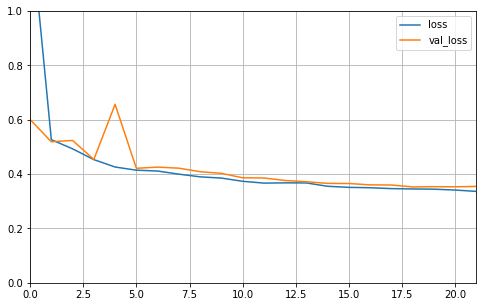

In [27]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curve(history)

In [28]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3541140087815218